In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score


In [20]:
#predict grade changes of student according to their absent days


In [24]:
data = pd.read_csv('student.csv')

In [26]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,higher education,higher education,at_home,teacher,...,very good,medium,high,very low,very low,good,6,5,6,6
1,GP,F,17,U,GT3,T,primary education (4th grade),primary education (4th grade),at_home,other,...,excellent,medium,medium,very low,very low,good,4,5,5,6
2,GP,F,15,U,LE3,T,primary education (4th grade),primary education (4th grade),at_home,other,...,very good,medium,low,low,medium,good,10,7,8,10
3,GP,F,15,U,GT3,T,higher education,5th to 9th grade,health,services,...,good,low,low,very low,very low,excellent,2,15,14,15
4,GP,F,16,U,GT3,T,secondary education,secondary education,other,other,...,very good,medium,low,very low,low,excellent,4,6,10,10


In [30]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [33]:
#Define Feature and Target Variable
Xvar = 'absences'
Yvar = 'G3'

In [39]:
X = data[[Xvar]]
Y = data[Yvar]

In [47]:
#Train and test Data
X_train ,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2 ,random_state = 42
)

In [59]:
#Fit data in model
model = LinearRegression()

In [61]:
model.fit(X_train,Y_train)

LinearRegression()

In [64]:
Y_pred = model.predict(X_test)

In [66]:
Y_pred

array([10.18843879, 10.22365219, 10.39971922, 10.39971922, 10.50535944,
       10.11801198, 10.18843879, 10.75185328, 10.11801198, 10.18843879,
       10.11801198, 10.32929241, 10.15322538, 10.11801198, 10.39971922,
       10.18843879, 10.11801198, 10.18843879, 10.11801198, 10.11801198,
       10.2588656 , 10.22365219, 10.11801198, 10.32929241, 10.11801198,
       10.47014604, 10.11801198, 10.11801198, 10.11801198, 10.39971922,
       11.45612141, 10.18843879, 10.11801198, 10.2588656 , 10.11801198,
       10.61099966, 10.11801198, 10.2588656 , 10.18843879, 10.61099966,
       10.18843879, 10.11801198, 10.2588656 , 10.39971922, 10.18843879,
       10.11801198, 10.54057285, 10.8222801 , 10.32929241, 10.2588656 ,
       10.39971922, 10.11801198, 10.11801198, 10.2588656 , 10.36450582,
       10.54057285, 10.18843879, 10.11801198, 10.18843879, 10.11801198,
       10.32929241, 10.39971922, 10.32929241, 10.2588656 , 10.2588656 ,
       10.11801198, 10.18843879, 10.2588656 , 10.43493263, 10.47

In [71]:
beta0 = model.intercept_

In [74]:
beta1 = model.coef_[0]

In [77]:
print(model.intercept_.shape)
print(model.coef_.shape)

()
(1,)


In [79]:
print(f"Intercept:{beta0}")
print(f"Slope :{beta1}")

Intercept:10.118011975464405
Slope :0.03521340608427015


In [81]:
#Calculate Metrices

In [89]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [94]:
r2 = r2_score(Y_test,Y_pred)

In [96]:
print(rmse)

4.584352385203368


In [98]:
print(r2)

-0.02493237479388699


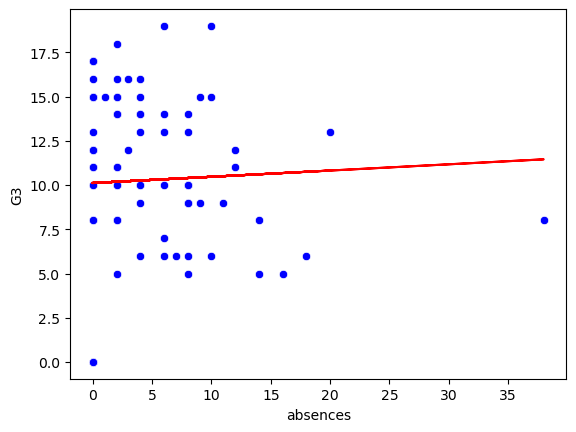

In [107]:
sns.scatterplot(x = X_test[Xvar],y=Y_test,color='blue')
plt.plot(X_test[Xvar],Y_pred,color='red')

In [127]:
#Predict
new_absent_data = {
    'absences': [10,20,30]
}

In [129]:
X_new = pd.DataFrame(new_absent_data)

In [131]:
X_new

,absences
0,10
1,20
2,30


In [133]:
Y_new_pred = model.predict(X_new)

In [135]:
Y_new_pred

array([10.47014604, 10.8222801 , 11.17441416])

In [139]:
X_new['Predicted_G3'] = Y_new_pred

In [142]:
X_new

,absences,Predicted_G3
0,10,10.470146
1,20,10.822280
2,30,11.174414


In [144]:
df = pd.read_csv('Sharemarketdata.csv')

In [146]:
df.head()

,Unnamed: 0,symbol,Ltp,%change,open,High,Low,Qty,Pclose,diff
0,0,ACLBSL,990.00,0.00,990.00,990.00,981.00,"1,482",990.00,0.0
1,1,ADBL,296.60,-0.77,302.00,302.00,295.00,"24,934",298.90,-2.3
2,2,AHL,633.10,2.78,628.30,652.00,612.09,"27,721",616.00,17.1
3,3,AHPC,279.60,-0.50,280.30,282.50,279.60,"63,987",281.00,-1.4
4,4,AKJCL,186.00,-0.48,186.00,187.80,184.10,"46,839",186.90,-0.9


In [148]:
X = df[['Ltp']]

In [150]:
Y = df['open']

In [ ]:
X_train,X_test,Y_